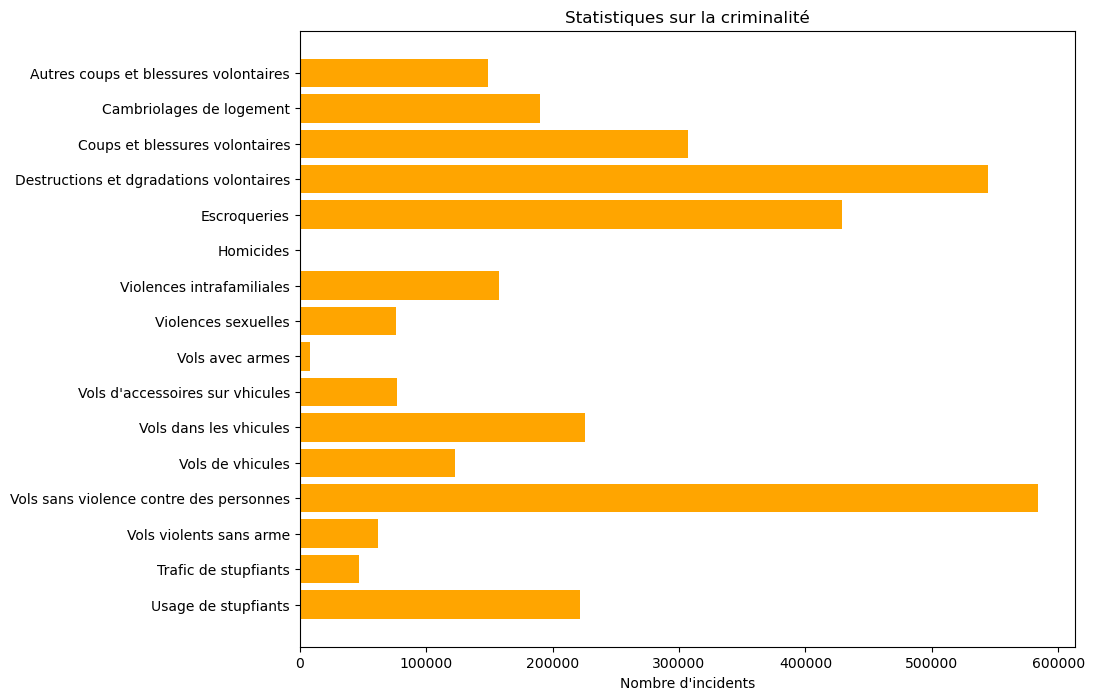

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour determiner les differents types de crimes
def read_and_plot_crime_data(filepath):

    # Lecture du fichier CSV
    try:
        # La fonction read_csv est utilisée pour lire le fichier. 
        data = pd.read_csv(filepath, header=None, names=["Type of Crime", "Count"], delimiter=';')
    except Exception as e:
        # Gestion des erreurs de lecture du fichier, par exemple si le fichier n'est pas trouvé ou est illisible.
        print(f"Erreur lors de la lecture du fichier : {e}")
        return

    # Traitement des données 
    if data.isnull().values.any():
        # Affichage d'un message en cas de données manquantes dans le fichier.
        print("Le fichier contient des valeurs manquantes. Veuillez vérifier le fichier d'entrée.")
        return
    
    # Création du graphique
    plt.figure(figsize=(10, 8))
    # Génération d'un graphique en barres horizontales montrant les types de crimes et leurs nombres d'incidents.
    plt.barh(data["Type of Crime"], data["Count"], color='orange')
    plt.xlabel("Nombre d'incidents")  
    plt.title("Statistiques sur la criminalité")  
    plt.gca().invert_yaxis()  
    plt.show()

# Appel de la fonction
read_and_plot_crime_data("type_crim.csv")



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_departments_crimes(url):
    # Envoi d'une requête vers le site web pour obtenir le contenu de la page
    response = requests.get(url)
    
    # Analyse du contenu HTML à l'aide de BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Recherche de la table spécifique contenant les données des départements et des crimes
    table = soup.find('table', class_='table-sm')
    
    # Extraction des lignes de la table
    rows = table.find_all('tr')
    data = []
    
    # Répétition sur chaque ligne pour extraire les données
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 0:
            # Extraction du nom du département et du nombre de crimes en 2021
            department = cols[0].text.strip()
            crimes_2021 = cols[1].text.strip().replace('\xa0', '')  # Suppression des espaces non significatifs
            data.append([department, crimes_2021])
    
    # Création d'un DataFrame à partir des données extraites
    df = pd.DataFrame(data, columns=['Département', 'Crimes_2021'])
    
    # Enregistrement des données dans un fichier CSV
    csv_path = 'departments_crimes_2021.csv'  
    df.to_csv(csv_path, index=False)
    
    # Retourne le chemin du fichier CSV généré 
    return csv_path

# Appel de la fonction scrape_departments_crimes avec l'URL du site
scrape_departments_crimes("https://crimes.politologue.com/departements/")


'departments_crimes_2021.csv'

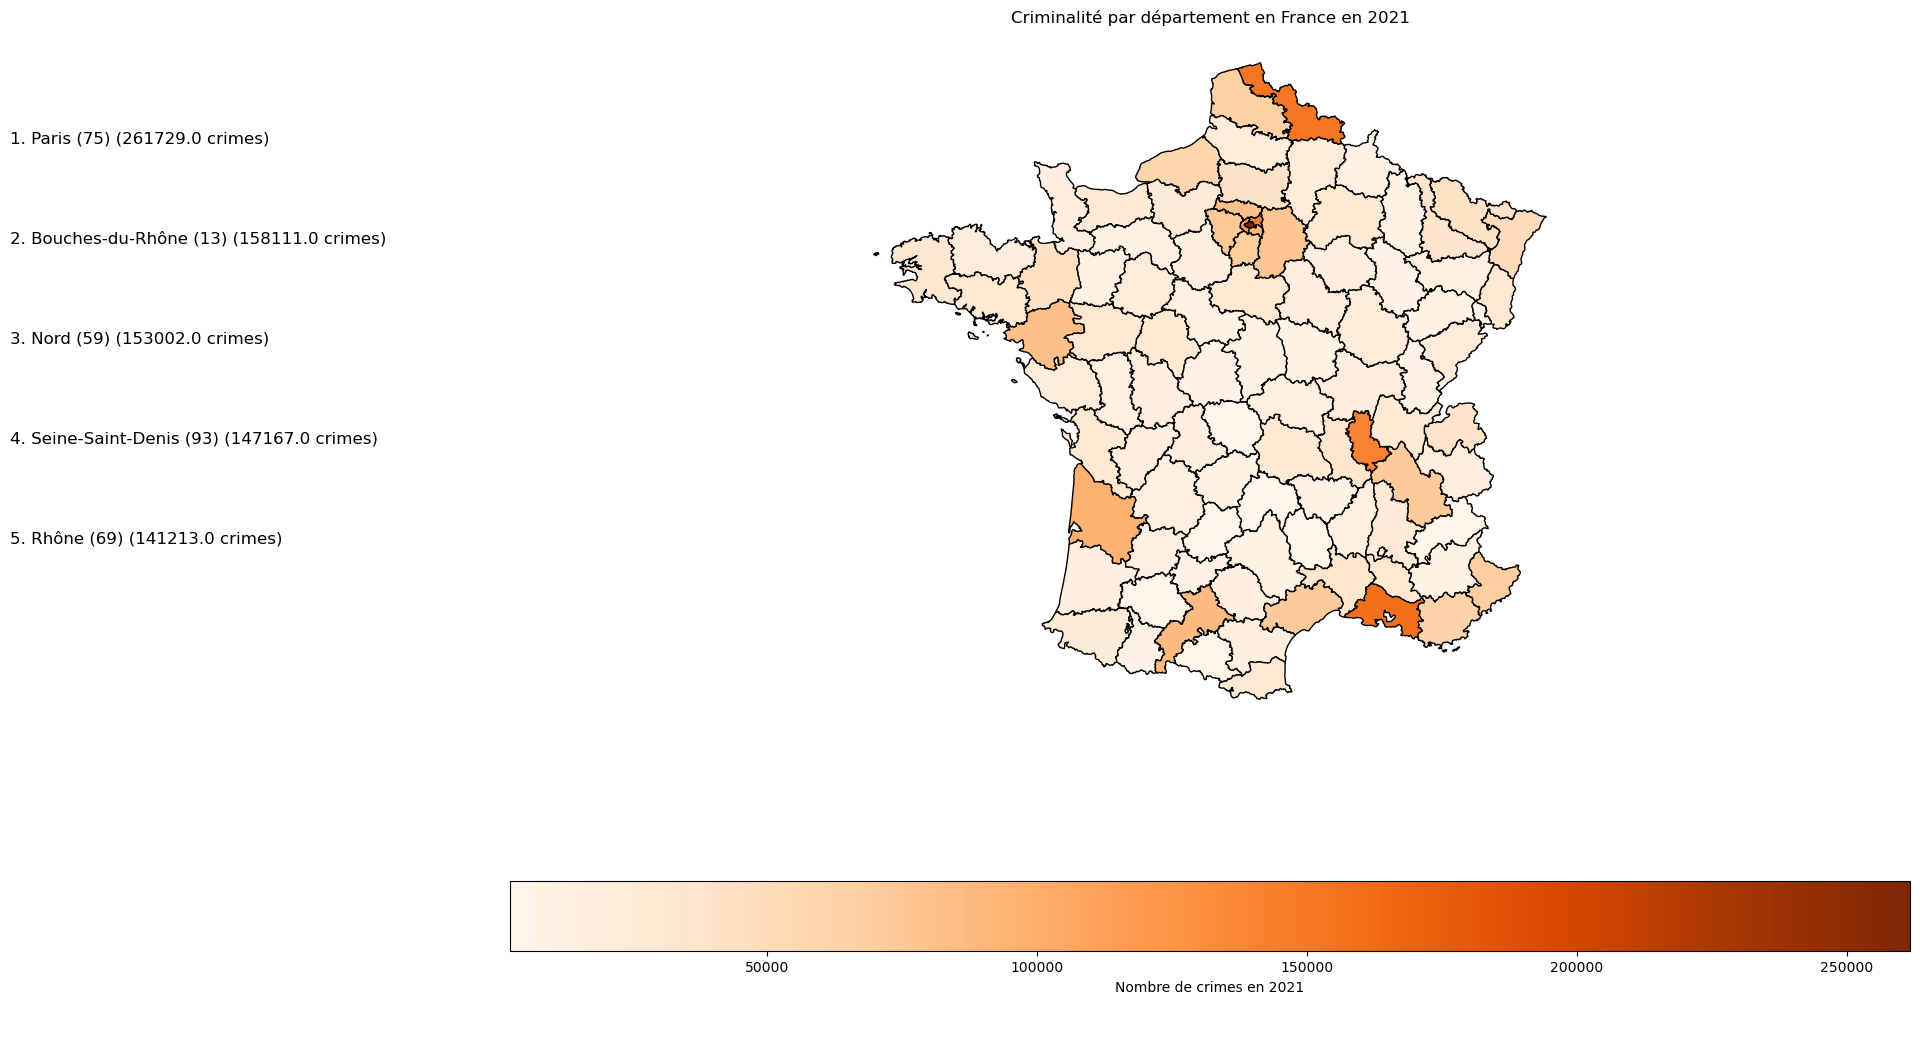

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Chargement des données sur les crimes à partir du fichier CSV
crime_data = pd.read_csv('departments_crimes_2021.csv')

# Chargement des données géographiques des départements français depuis le fichier GeoJSON
gdf = gpd.read_file('departements.geojson')

# Préparation des données sur les crimes pour la fusion en ajoutant le code du département
crime_data['code_dept'] = crime_data['Département'].str.extract(r'\((\d+)\)')

# Conversion des données sur les crimes pour l'analyse
if crime_data['Crimes_2021'].dtype == 'object':
    crime_data['Crimes_2021'] = pd.to_numeric(crime_data['Crimes_2021'].str.replace(' ', ''), errors='coerce')
else:
    crime_data['Crimes_2021'] = pd.to_numeric(crime_data['Crimes_2021'], errors='coerce')

# Fusion des données sur les crimes avec les données géographiques des départements
gdf = gdf.merge(crime_data, left_on='code', right_on='code_dept', how='left')

# Sélection des 5 départements avec le plus grand nombre de crimes
top_departments = gdf.sort_values(by='Crimes_2021', ascending=False).head(5)

# Création de la figure pour afficher la carte
fig = plt.figure(figsize=(20, 10))
ax_map = fig.add_axes([0.3, 0, 0.7, 1])  
ax_text = fig.add_axes([0.05, 0, 0.25, 1])  
ax_text.axis('off')  

# Tracé de la carte de la criminalité par département avec légende
gdf.plot(column='Crimes_2021', ax=ax_map, legend=True,
         legend_kwds={'label': "Nombre de crimes en 2021", 'orientation': "horizontal"},
         cmap='Oranges', edgecolor='black')
ax_map.set_title('Criminalité par département en France en 2021')
ax_map.axis('off') 

# Ajout du classement des départements sur le côté gauche
for i, row in enumerate(top_departments.itertuples(), 1):
    ax_text.text(0, 1 - 0.1 * i, f'{i}. {row.Département} ({row.Crimes_2021} crimes)',
                 fontsize=12, verticalalignment='top')

# Affichage de la carte
plt.show()


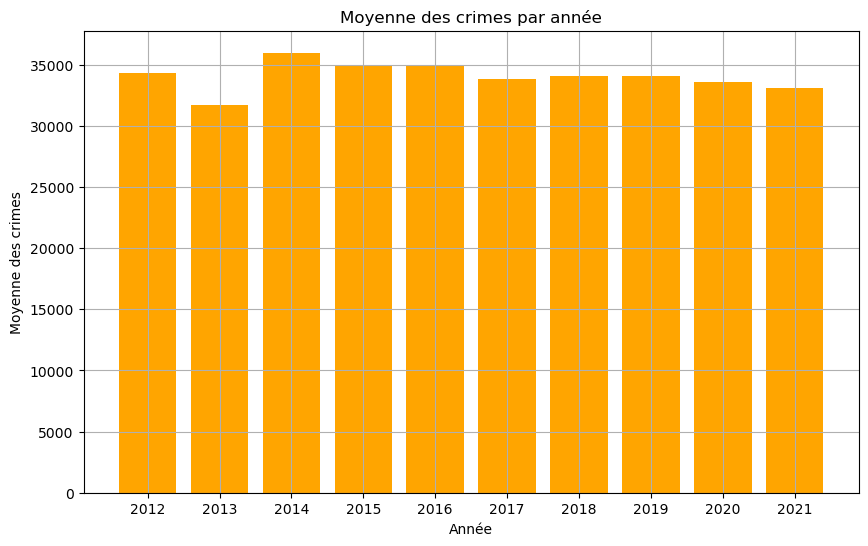

'france_crimes_moyenne_par_colonne.csv'

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_departments_crimes(url):
    # Envoi d'une requête vers le site web pour obtenir le contenu de la page
    response = requests.get(url)
    
    # Analyse du contenu HTML à l'aide de BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Recherche de la table spécifique contenant les données des départements et des crimes
    table = soup.find('table', class_='table-sm')
    
    # Extraction des lignes de la table
    rows = table.find_all('tr')
    data = []
    
    # Répétition sur chaque ligne pour extraire les données
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 0:
            # Extraction du nom du département et du nombre de crimes en 2021
            department = cols[0].text.strip()
            crimes_2021 = cols[19].text.strip().replace('\xa0', '')  # Suppression des espaces non significatifs
            crimes_2020 = cols[17].text.strip().replace('\xa0', '')
            crimes_2019 = cols[15].text.strip().replace('\xa0', '')
            crimes_2018 = cols[13].text.strip().replace('\xa0', '')
            crimes_2017 = cols[11].text.strip().replace('\xa0', '')
            crimes_2016 = cols[9].text.strip().replace('\xa0', '')
            crimes_2015 = cols[7].text.strip().replace('\xa0', '')
            crimes_2014 = cols[5].text.strip().replace('\xa0', '')
            crimes_2013 = cols[3].text.strip().replace('\xa0', '')
            crimes_2012 = cols[1].text.strip().replace('\xa0', '')
            data.append([department, crimes_2012, crimes_2013, crimes_2014, crimes_2015, crimes_2016, crimes_2017, crimes_2018, crimes_2019, crimes_2020, crimes_2021])
    
    # Création d'un DataFrame à partir des données extraites
    df = pd.DataFrame(data, columns=['Département', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
    
    # Sélection des colonnes avec les données numériques pour calculer les moyennes
    numeric_data = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    
    # Calcul des moyennes pour chaque colonne
    df_moyenne = numeric_data.mean(axis=0)
    
    # Ajout des noms des colonnes pour le DataFrame des moyennes
    df_moyenne = pd.DataFrame(df_moyenne).T
    df_moyenne.columns = numeric_data.columns
    
    # Enregistrement des données dans un fichier CSV
    csv_path = 'france_crimes_moyenne_par_colonne.csv'  
    df_moyenne.to_csv(csv_path, index=False, header=True)
    
    # Affichage du graphique
    years = df_moyenne.columns.tolist()
    crimes_means = df_moyenne.values.tolist()[0]
    
    plt.figure(figsize=(10, 6))
    plt.bar(years, crimes_means, color='orange')
    plt.xlabel('Année')
    plt.ylabel('Moyenne des crimes')
    plt.title('Moyenne des crimes par année')
    plt.grid(True)
    plt.show()
    
    # Retourne le chemin du fichier CSV généré 
    return csv_path

# Appel de la fonction scrape_departments_crimes avec l'URL du site
scrape_departments_crimes("https://crimes.politologue.com/departements/")


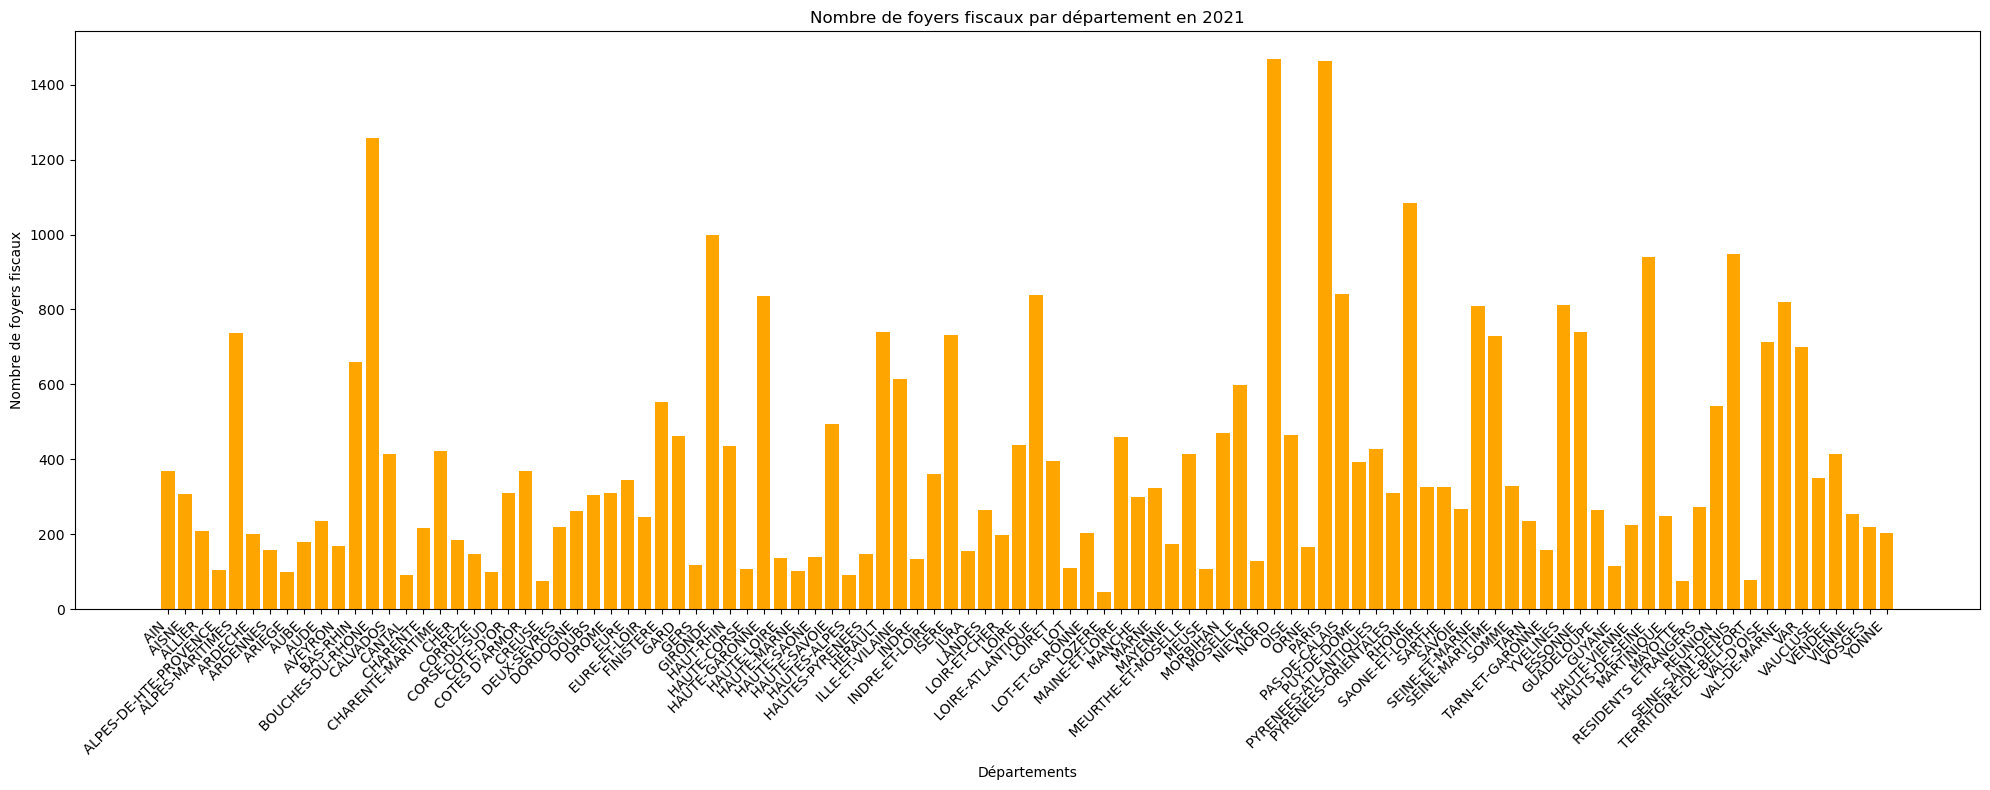

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV avec le délimiteur 
df_foyers = pd.read_csv("nmbr_foyers.csv", delimiter=';')

# Nettoyer les noms des colonnes pour enlever les espaces potentiels
df_foyers.columns = [col.strip() for col in df_foyers.columns]

# Filtrer les données pour l'année 2021
df_2021 = df_foyers[['DPARTEMENTS', '2021']]

# Exclure la ligne contenant "NOMBRE TOTAL" dans la colonne 'DPARTEMENTS'
df_2021 = df_2021[df_2021['DPARTEMENTS'] != 'NOMBRE TOTAL']

# Trier les données par départements
df_sorted = df_2021.sort_values(by='DPARTEMENTS', ascending=True)

def plot_graph(df, year, save_path=None):
    departments = df['DPARTEMENTS']
    values = df[year].astype(int)  

    # Créer la figure et le sous-graphique 
    fig, ax = plt.subplots(figsize=(20, 8))  

    # Tracer les données sous forme de barres verticales
    ax.bar(departments, values,  color='orange')

    # Étiqueter les axes et le titre
    ax.set_xlabel('Départements')
    ax.set_ylabel('Nombre de foyers fiscaux')
    ax.set_title(f'Nombre de foyers fiscaux par département en {year}')

    # Rotation des étiquettes de l'axe des x à 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45, ha='right')  

  
    plt.subplots_adjust(bottom=0.2)  

    # Ajuster la disposition pour éviter le chevauchement du texte
    plt.tight_layout()
    plt.show()

    # Enregistrer le graphique sous forme de PNG 
    if save_path:
        fig.savefig(save_path)

# Afficher le graphique pour 2021 et sauvegarder en tant que PNG
plot_graph(df_sorted, '2021', save_path='graphique_foyers_2021.png')


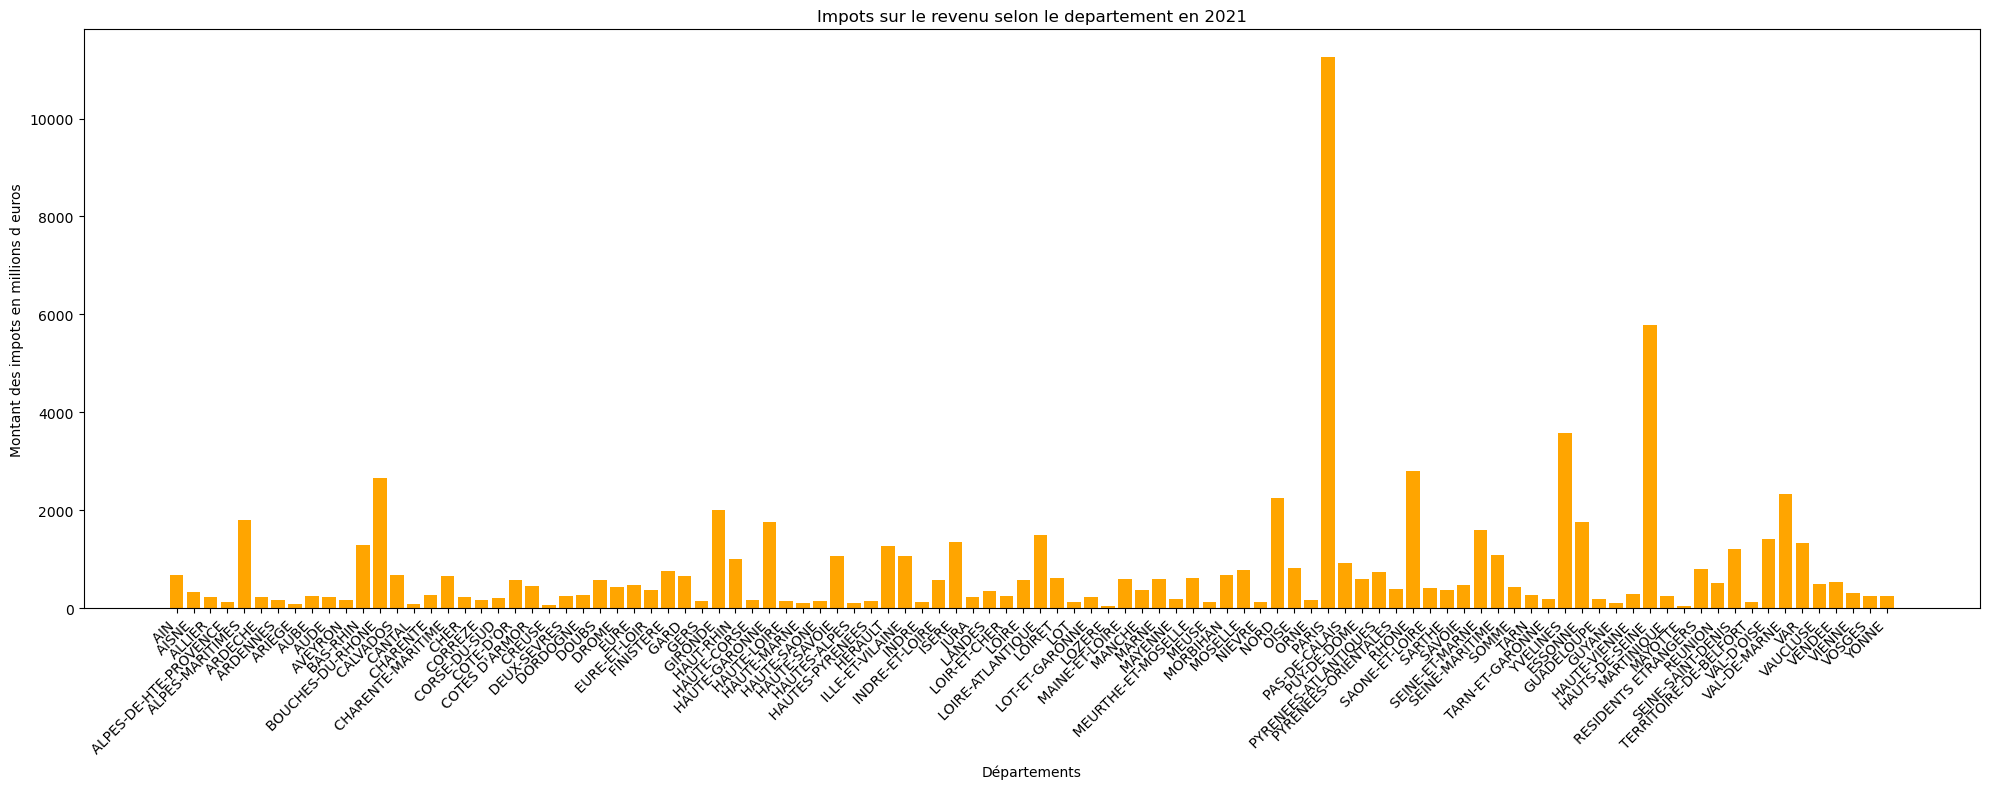

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV avec le délimiteur 
df_foyers = pd.read_csv("nmbr_impots.csv", delimiter=';')

# Nettoyer les noms des colonnes pour enlever les espaces potentiels
df_foyers.columns = [col.strip() for col in df_foyers.columns]

# Filtrer les données pour l'année 2021
df_2021 = df_foyers[['DPARTEMENTS', '2021']]

# Exclure la ligne contenant "MONTANT TOTAL" dans la colonne 'DPARTEMENTS'
df_2021 = df_2021[df_2021['DPARTEMENTS'] != 'MONTANT TOTAL']

# Trier les données par départements
df_sorted = df_2021.sort_values(by='DPARTEMENTS', ascending=True)

def plot_graph(df, year, save_path=None):
    departments = df['DPARTEMENTS']
    values = df[year].astype(int)  

    # Créer la figure et le sous-graphique 
    fig, ax = plt.subplots(figsize=(20, 8))  

    # Tracer les données sous forme de barres verticales
    ax.bar(departments, values, color='orange')

    # Étiqueter les axes et le titre
    ax.set_xlabel('Départements')
    ax.set_ylabel('Montant des impots en millions d euros')
    ax.set_title(f'Impots sur le revenu selon le departement en {year}')

    # Rotation des étiquettes de l'axe des x à 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45, ha='right')  

  
    plt.subplots_adjust(bottom=0.2)  

    # Ajuster la disposition pour éviter le chevauchement du texte
    plt.tight_layout()
    plt.show()

    # Enregistrer le graphique sous forme de PNG 
    if save_path:
        fig.savefig(save_path)

# Afficher le graphique pour 2021 et sauvegarder en tant que PNG
plot_graph(df_sorted, '2021', save_path='graphique_impots_2021.png')

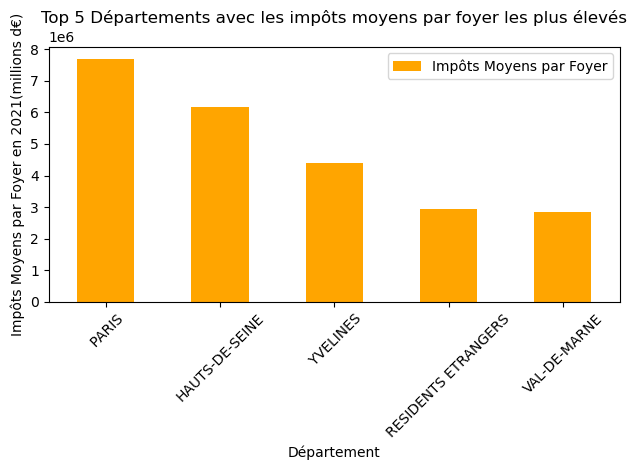

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Noms des fichiers
chemin_foyers = 'nmbr_foyers.csv'
chemin_impots = 'nmbr_impots.csv'
chemin_intermediaire = 'impots_moyens_par_foyer.csv'  # Fichier intermédiaire

# Fonction pour récupérer les données des deux fichiers
def charger_donnees(chemin_foyers, chemin_impots):
    df_foyers = pd.read_csv(chemin_foyers, delimiter=';', header=None)
    df_impots = pd.read_csv(chemin_impots, delimiter=';', header=None)
    
    df_foyers.columns = ['DEPARTEMENTS'] + [str(année) for année in range(2014, 2023)]
    df_impots.columns = ['DEPARTEMENTS'] + [str(année) for année in range(2014, 2023)]
    
    df_foyers.set_index('DEPARTEMENTS', inplace=True)
    df_impots.set_index('DEPARTEMENTS', inplace=True)
    
    return df_foyers, df_impots

# Fonction pour calculer les impôts pour un foyer moyen
def calculer_moyenne_impots_par_foyer(df_foyers, df_impots, année):
    foyers = df_foyers[str(année)]
    impots = df_impots[str(année)] * 1_000_000  # Conversion en euros
    
    # Calcul des moyennes
    moyenne_impots_par_foyer = impots / foyers
    moyenne_impots_par_foyer = moyenne_impots_par_foyer.dropna().sort_values(ascending=False)
    
    # Enregistrement dans un fichier intermédiaire
    moyenne_impots_par_foyer.to_csv(chemin_intermediaire, header=['Impôts Moyens par Foyer'])
    
    return moyenne_impots_par_foyer

# Fonction pour afficher les résultats sur un graphique
def visualiser_donnees(chemin_csv):
    données = pd.read_csv(chemin_csv, index_col=0)
    données.columns = ['Impôts Moyens par Foyer']  
    
    # Trie les données pour le graphique avec le top 5 ( on change juste head par tail pour les plus bas)
    top_5 = données.sort_values(by='Impôts Moyens par Foyer', ascending=False).head(5)
    top_5.plot(kind='bar', color='orange')
    plt.title('Top 5 Départements avec les impôts moyens par foyer les plus élevés')
    plt.xlabel('Département')
    plt.ylabel('Impôts Moyens par Foyer en 2021(millions d€)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Appels des fonctions
df_foyers, df_impots = charger_donnees(chemin_foyers, chemin_impots)
impots_moyens_2021 = calculer_moyenne_impots_par_foyer(df_foyers, df_impots, 2021)
visualiser_donnees(chemin_intermediaire)

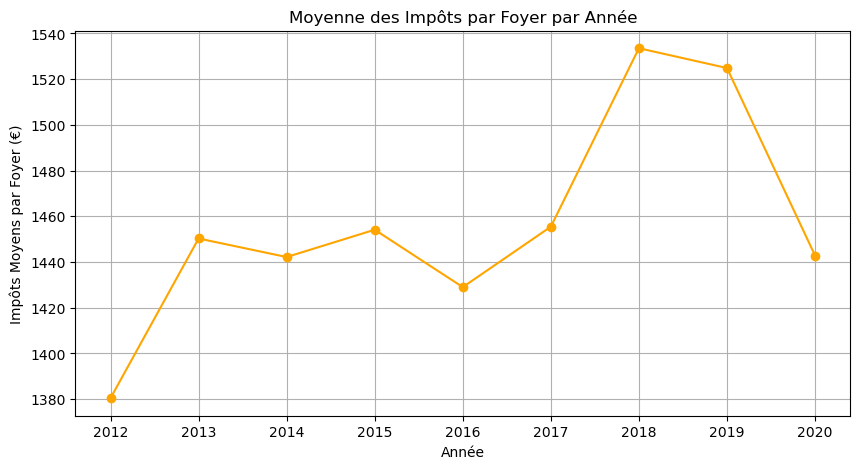

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier de données
chemin_fichier = 'impots_fr.csv'  

# Chargement des données
df = pd.read_csv(chemin_fichier, delimiter=';', header=None)

# Préparation des données
df.columns = ['Département', 'Année', 'Foyers', 'Impôts_Total']

# Calcul des impôts par foyer
df['Impôts_par_Foyer'] = df['Impôts_Total'] / df['Foyers']

# Moyenne des données par année
moyenne_impôts_annuelle = df.groupby('Année')['Impôts_par_Foyer'].mean().reset_index()

# Exporter les résultats dans un nouveau fichier CSV
chemin_fichier_sortie = 'moyenne_impots_par_foyer_par_annee.csv'
moyenne_impôts_annuelle.to_csv(chemin_fichier_sortie, index=False)

# Création d'un graphique
plt.figure(figsize=(10, 5))  
plt.plot(moyenne_impôts_annuelle['Année'], moyenne_impôts_annuelle['Impôts_par_Foyer'], marker='o', color='orange')
plt.title('Moyenne des Impôts par Foyer par Année')
plt.xlabel('Année')
plt.ylabel('Impôts Moyens par Foyer (€)')
plt.grid(True)
plt.show()
